Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Missing values ("I DON'T KNOW") replaced with most common answer (mode) or with the most neutral answer (e.g. "NORMAL" or "IT IS THE SAME").

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [3]:
data = pd.read_pickle("survey_transformed2.pkl")

In [4]:
data.head()

,ANY,NOM_DISTRICTE,Would_not_stay_in_the_neighborhood,Gender,Time_living_in_barri,Barri_evolution2,Barri_future2,Barri_satisfaction_of_living,Barri_comparison2,GARBAGE COLLECTION,...,Social_class2,Living_alone,BCN_evolution2,BCN_future2,BCN_satisfaction_of_living,BCN_transport,BCN_over_barri_evolution2,BCN_over_barri_future2,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport
0,2011,EIXAMPLE,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,NOT SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-HIGH,1,IT IS WORSE,IT WILL GET WORSE,SATISFIED,GOOD,0,0,1,0
1,2011,EIXAMPLE,0.0,1,MORE THAN 10 YEARS,IT IS THE SAME,IT WILL STAY THE SAME,SATISFIED,"NEITHER THE BEST, NOR THE WORST",BAD,...,MIDDLE-MIDDLE,0,IT IS WORSE,IT WILL GET WORSE,SATISFIED,NORMAL,0,0,0,0
2,2011,EIXAMPLE,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL STAY THE SAME,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-MIDDLE,1,IT IS THE SAME,IT WILL IMPROVE,SATISFIED,GOOD,1,1,0,0
3,2011,EIXAMPLE,0.0,1,LESS THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,SATISFIED,ONE OF THE BEST,GOOD,...,MIDDLE-MIDDLE,1,IT IS WORSE,IT WILL STAY THE SAME,SATISFIED,GOOD,0,1,0,0
4,2011,EIXAMPLE,1.0,0,MORE THAN 10 YEARS,IT IS THE SAME,IT WILL STAY THE SAME,NOT SATISFIED,"NEITHER THE BEST, NOR THE WORST",BAD,...,MIDDLE-LOW,0,IT IS THE SAME,IT WILL STAY THE SAME,SATISFIED,NORMAL,0,0,1,0


In [5]:
data.shape

(6245, 35)

In [6]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'Would_not_stay_in_the_neighborhood',
 'Gender',
 'Time_living_in_barri',
 'Barri_evolution2',
 'Barri_future2',
 'Barri_satisfaction_of_living',
 'Barri_comparison2',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'FACADES AND BUILDING CONSERVATION',
 'CIRCULATION',
 'BUS',
 'MUNICIPAL POLICE',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITIZEN SECURITY IN THE NEIGHBORHOOD',
 'MUNICIPAL MARKETS',
 'Barri_transport',
 'Owns_a_car',
 'House_size2',
 'Monthly_family_income2',
 'Social_class2',
 'Living_alone',
 'BCN_evolution2',
 'BCN_future2',
 'BCN_satisfaction_of_living',
 'BCN_transport',
 'BCN_over_barri_evolution2',
 'BCN_over_barri_future2',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport']

In [7]:
x_var = data.columns.tolist()

In [8]:
for i in ['ANY', 'Would_not_stay_in_the_neighborhood',
          'BCN_evolution2', 'BCN_future2', 'BCN_satisfaction_of_living', 'BCN_transport']:
    x_var.remove(i)

In [9]:
x = data[x_var]

In [10]:
y = data['Would_not_stay_in_the_neighborhood']

In [11]:
x = pd.get_dummies(x, drop_first = True)

In [12]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.300478
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.175      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 3850.9692  
Date:                  2021-04-14 08:39                      BIC:                 4181.2065  
No. Observations:      6245                                  Log-Likelihood:      -1876.5    
Df Model:              48                                    LL-Null:             -2274.7    
Df Residuals:          6196                                  LLR p-value:         3.0978e-136
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [13]:
result.pvalues.sort_values(ascending=False)

GARBAGE COLLECTION_GOOD                         9.809125e-01
FACADES AND BUILDING CONSERVATION_GOOD          9.431387e-01
CIRCULATION_GOOD                                8.717687e-01
Barri_evolution2_IT IS WORSE                    7.533416e-01
NOM_DISTRICTE_GRÀCIA                            7.226417e-01
Barri_transport_GOOD                            7.156944e-01
ASPHALT AND STREET CONSERVATION_GOOD            6.992710e-01
Barri_evolution2_IT IS THE SAME                 6.690285e-01
House_size2_< 50 M2                             6.624411e-01
PUBLIC LIGHTING_GOOD                            6.237184e-01
MUNICIPAL POLICE_GOOD                           6.185992e-01
Owns_a_car                                      5.890816e-01
BCN_over_barri_evolution2                       4.835356e-01
NOM_DISTRICTE_SANT ANDREU                       4.419332e-01
MUNICIPAL MARKETS_GOOD                          4.311359e-01
Monthly_family_income2_2001-3000 EUROS          4.190368e-01
Gender                  

In [14]:
for i in ['GARBAGE COLLECTION', 'FACADES AND BUILDING CONSERVATION', 'CIRCULATION', 'Barri_evolution2', 'Barri_transport',
         'ASPHALT AND STREET CONSERVATION']:
    x_var.remove(i)

In [15]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [16]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.300691
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.174      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 3837.6330  
Date:                  2021-04-14 08:39                      BIC:                 4113.9540  
No. Observations:      6245                                  Log-Likelihood:      -1877.8    
Df Model:              40                                    LL-Null:             -2274.7    
Df Residuals:          6204                                  LLR p-value:         9.2137e-141
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [17]:
result.pvalues.sort_values(ascending=False)

NOM_DISTRICTE_GRÀCIA                            7.468962e-01
House_size2_< 50 M2                             6.640586e-01
Owns_a_car                                      6.295370e-01
PUBLIC LIGHTING_GOOD                            5.980843e-01
MUNICIPAL POLICE_GOOD                           5.750823e-01
NOM_DISTRICTE_SANT ANDREU                       4.655532e-01
Gender                                          4.605216e-01
Monthly_family_income2_2001-3000 EUROS          4.433611e-01
MUNICIPAL MARKETS_GOOD                          4.298386e-01
BCN_over_barri_evolution2                       3.914473e-01
House_size2_> 150 M2                            3.662823e-01
NOM_DISTRICTE_SANTS - MONTJUÏC                  3.267848e-01
NOM_DISTRICTE_NOU BARRIS                        3.174925e-01
BCN_over_barri_future2                          3.152679e-01
House_size2_51-100 M2                           2.712701e-01
STREETS CLEANING_GOOD                           2.365556e-01
NOM_DISTRICTE_HORTA - GU

In [18]:
for i in ['House_size2', 'Owns_a_car', 'PUBLIC LIGHTING', 'MUNICIPAL POLICE', 'Gender']:
    x_var.remove(i)

In [19]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [20]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.300928
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.174      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 3826.5905  
Date:                  2021-04-14 08:39                      BIC:                 4055.7348  
No. Observations:      6245                                  Log-Likelihood:      -1879.3    
Df Model:              33                                    LL-Null:             -2274.7    
Df Residuals:          6211                                  LLR p-value:         7.1181e-145
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [21]:
result.pvalues.sort_values(ascending=False)

NOM_DISTRICTE_GRÀCIA                            9.292167e-01
NOM_DISTRICTE_SANT ANDREU                       5.944378e-01
NOM_DISTRICTE_SANTS - MONTJUÏC                  4.536278e-01
MUNICIPAL MARKETS_GOOD                          4.465274e-01
Monthly_family_income2_2001-3000 EUROS          4.463091e-01
NOM_DISTRICTE_NOU BARRIS                        4.153872e-01
BCN_over_barri_evolution2                       4.019937e-01
BCN_over_barri_future2                          3.332170e-01
NOM_DISTRICTE_HORTA - GUINARDÓ                  2.998218e-01
STREETS CLEANING_GOOD                           2.044922e-01
Social_class2_MIDDLE-HIGH                       1.301920e-01
NOM_DISTRICTE_SANT MARTÍ                        1.203717e-01
BUS_GOOD                                        1.172229e-01
Barri_future2_IT WILL STAY THE SAME             1.069694e-01
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD    1.044631e-01
NOM_DISTRICTE_EIXAMPLE                          1.019480e-01
Monthly_family_income2_>

In [22]:
for i in ['MUNICIPAL MARKETS', 'BCN_over_barri_evolution2', 'BCN_over_barri_future2', 'STREETS CLEANING']:
    x_var.remove(i)

In [23]:
x = data[x_var]
x = pd.get_dummies(x, drop_first = True)

In [24]:
logit_model = sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.301218
         Iterations 7
                                       Results: Logit
Model:                 Logit                                 Pseudo R-squared:    0.173      
Dependent Variable:    Would_not_stay_in_the_neighborhood    AIC:                 3822.2114  
Date:                  2021-04-14 08:39                      BIC:                 4024.3974  
No. Observations:      6245                                  Log-Likelihood:      -1881.1    
Df Model:              29                                    LL-Null:             -2274.7    
Df Residuals:          6215                                  LLR p-value:         5.8508e-147
Converged:             1.0000                                Scale:               1.0000     
No. Iterations:        7.0000                                                                
--------------------------------------------------------------------------------------------

In [25]:
result.pvalues.sort_values(ascending=False)

NOM_DISTRICTE_GRÀCIA                            9.101717e-01
NOM_DISTRICTE_SANT ANDREU                       5.397031e-01
NOM_DISTRICTE_SANTS - MONTJUÏC                  4.609163e-01
NOM_DISTRICTE_NOU BARRIS                        4.203447e-01
Monthly_family_income2_2001-3000 EUROS          3.943741e-01
NOM_DISTRICTE_HORTA - GUINARDÓ                  2.958028e-01
Social_class2_MIDDLE-HIGH                       1.420455e-01
NOM_DISTRICTE_SANT MARTÍ                        1.219590e-01
BUS_GOOD                                        1.079095e-01
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD    1.037862e-01
NOM_DISTRICTE_EIXAMPLE                          1.033846e-01
Barri_future2_IT WILL STAY THE SAME             1.012152e-01
Monthly_family_income2_> 3000 EUROS             9.837364e-02
Social_class2_MIDDLE-LOW                        9.193559e-02
Social_class2_MIDDLE-MIDDLE                     7.998572e-02
Social_class2_LOW                               6.512681e-02
NOM_DISTRICTE_SARRIÀ - S

In [26]:
print(result.get_margeff().summary())

                Logit Marginal Effects               
Dep. Variable:     Would_not_stay_in_the_neighborhood
Method:                                          dydx
At:                                           overall
                                                  dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Living_alone                                     0.0188      0.009      2.137      0.033       0.002       0.036
BCN_over_barri_satisfaction_of_living            0.0381      0.017      2.222      0.026       0.004       0.072
BCN_over_barri_transport                         0.0331      0.011      3.025      0.002       0.012       0.055
NOM_DISTRICTE_EIXAMPLE                          -0.0263      0.016     -1.629      0.103      -0.058       0.005
NOM_DISTRICTE_GRÀCIA                            -0.0021      0.019     -0.113      0.910      -0.039      

In [27]:
result.pred_table()

array([[5437.,   67.],
       [ 627.,  114.]])

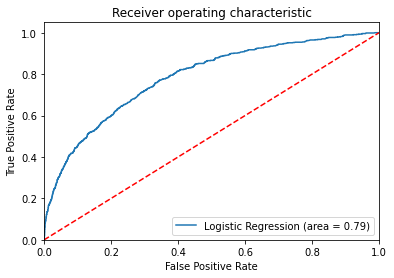

In [28]:
logit_roc_auc = roc_auc_score(y, result.predict(x))
fpr, tpr, thresholds = roc_curve(y, result.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()